# Modelos 03
### Sistema Não-Binário
#### Karla Pascoalini e Cauê Santos

## ID: Modelos 4

### Proponente: Milu Iluminarius MLVI 
_(rei do reino de Lumi. Diz a lenda que Milu Iluminarius I virou rei pois foi o único que conseguiu remover A Grande Espada da Luz da Lua que estava fincada em uma pedra. Essa história na verdade é uma grande balela e ele apenas virou rei pois seus pais eram detentores de terras)._

#### Comentário: 
O rei de Lumi está preocupado com um ataque iminente de um dragão e por conta disso (e pelo fato de ele ser o rei…) ele não postou esta tarefa no Mural de Missões mas sim delegou direto para todos vocês.

#### Objetivo:
O rei Iluminarius levantou as hipóteses abaixo durante sua última reunião com a cúpula de Ciência, Tecnologia e Encantamentos do reinado. Sua tarefa é responder ao menos 2 das hipóteses formuladas pelo rei. Para este trabalho, utilize o dataset de diamantes do seaborn (ouvi dizer que existe um pergaminho na Biblioteca Real que têm informações sobre este dataset!).

1.) Realizar normalização padrão dos atributos melhora a performance de modelos induzidos pelo algoritmo de k-vizinhos mais próximos

2.) Realizar normalização padrão dos atributos melhora a performance de modelos induzidos pelo algoritmo de árvore de decisão

3.) Reduzir a dimensinalidade do problema utilizando PCA melhora a performance de modelos induzidos pelo algoritmo de k-vizinhos mais próximos

4.) Reduzir a dimensinalidade do problema utilizando PCA melhora a performance de modelos induzidos pelo algoritmo de árvore de decisão

#### Comentários Adicionais:
Não é necessário realizar um teste de hipóteses estatístico neste exercício. Podem testar as hipóteses apenas checando o que ocorre e elaborando uma conclusão razoável pontuada com bom-senso. Mas se quiserem usar testes de hipóteses (aqueles com p-valor e tal) fiquem à vontade também, só não é um requerimento.

### Importanto Diamonds do Seaborn

In [188]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from itertools import chain

DATASET_NAME = "diamonds"
df = sns.load_dataset(DATASET_NAME)

#### Transformando os dados categóricos em numéricos:

In [189]:
# Cut
cut = df["cut"].values.reshape(-1, 1)

ordem = [["Fair", "Good", "Very Good", "Ideal", "Premium"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(cut)

dados_convertidos = encoder.transform(cut)


flat_dados = list(chain(*dados_convertidos))

df['cut_2'] = pd.Series(flat_dados)

#Clarity
clarity = df["clarity"].values.reshape(-1, 1)

ordem = [["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]] 
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(clarity)
dados_convertidos = encoder.transform(clarity)
flat_dados2 = list(chain(*dados_convertidos))
df['clarity_2'] = pd.Series(flat_dados2)

#Color
color = df["color"].values.reshape(-1, 1)

ordem = [["J", "I", "H", "G", "F", "E", "D"]]
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(color)
dados_convertidos = encoder.transform(color)
flat_dados3 = list(chain(*dados_convertidos))
df['color_2'] = pd.Series(flat_dados3)

df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_2,clarity_2,color_2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0,1.0,5.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,2.0,5.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,3.0,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.0,2.0,6.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,6.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,6.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4.0,1.0,2.0


In [190]:
FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_2', 'cut_2', 'color_2']
TARGET = ['price']

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()  # remove linhas com células vazia

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X = X.values
y = y.values.ravel()  # o método `ravel` deixa os dados em 1 dimensão

#### Fazer a normalização-padrão dos dados:

#### Transformando dados categóricos:

In [191]:
#REALIZANDO NORMALIZAÇÃO PADRÃO
DATASET_NAME = "diamonds"
FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_2', 'cut_2', 'color_2']
TARGET = ['price']

df2 = sns.load_dataset(DATASET_NAME)
# Cut
cut = df2["cut"].values.reshape(-1, 1)

ordem = [["Fair", "Good", "Very Good", "Ideal", "Premium"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(cut)

dados_convertidos = encoder.transform(cut)


flat_dados = list(chain(*dados_convertidos))

df2['cut_2'] = pd.Series(flat_dados)

#Clarity
clarity = df2["clarity"].values.reshape(-1, 1)

ordem = [["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]] 
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(clarity)
dados_convertidos = encoder.transform(clarity)
flat_dados2 = list(chain(*dados_convertidos))
df2['clarity_2'] = pd.Series(flat_dados2)

#Color
color = df2["color"].values.reshape(-1, 1)

ordem = [["J", "I", "H", "G", "F", "E", "D"]]
encoder = OrdinalEncoder(categories=ordem)

encoder.fit(color)
dados_convertidos = encoder.transform(color)
flat_dados3 = list(chain(*dados_convertidos))
df2['color_2'] = pd.Series(flat_dados3)

df2

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_2,clarity_2,color_2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0,1.0,5.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,2.0,5.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,3.0,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.0,2.0,6.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,6.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,6.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4.0,1.0,2.0


In [192]:
df2 = df2.reindex(FEATURES + TARGET, axis=1)
df2 = df2.dropna()  # remove linhas com células vazia

X2 = df2.reindex(FEATURES, axis=1)
y2 = df2.reindex(TARGET, axis=1)

X2 = X2.values
y2 = y2.values.ravel() 


#REALIZANDO NORMALIZAÇÃO PADRÃO
for i in FEATURES:
    mean = df2[i].mean()
    std = df2[i].std()
    df2[i] = (df2[i] - mean)/std
    
print(42*'-', 'Dados Normalizados', 42*'-')
print(df2)
print(42*'-', 'Dados Não-Normalizados', 39*'-')
print(df)

------------------------------------------ Dados Normalizados ------------------------------------------
          carat     depth     table         x         y         z  clarity_2  \
0     -1.198157 -0.174090 -1.099662 -1.587823 -1.536181 -1.571115  -1.245204   
1     -1.240350 -1.360726  1.585514 -1.641310 -1.658759 -1.741159  -0.638089   
2     -1.198157 -3.384987  3.375631 -1.498677 -1.457382 -1.741159   0.576140   
3     -1.071577  0.454129  0.242926 -1.364959 -1.317293 -1.287708  -0.030975   
4     -1.029384  1.082348  0.242926 -1.240155 -1.212227 -1.117663  -1.245204   
...         ...       ...       ...       ...       ...       ...        ...   
53935 -0.164426 -0.662705 -0.204603  0.016798  0.022304 -0.054887  -0.638089   
53936 -0.164426  0.942744 -1.099662 -0.036690  0.013548  0.100987  -0.638089   
53937 -0.206619  0.733338  1.137985 -0.063434 -0.047740  0.030135  -0.638089   
53938  0.130926 -0.523100  0.242926  0.373380  0.337503  0.285201  -1.245204   
53939 -0.101136

### 1ª Hipótese: Realizar normalização padrão dos atributos melhora a performance de modelos induzidos pelo algoritmo de k-vizinhos mais próximos

##### 1º Determinar a performance de modelos induzidos por k-vizinhos mais próximos, sem a normalização

##### Split de Dados:

In [193]:
SEMENTE_ALEATORIA = 66679

TAMANHO_TESTE = 0.09

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

print(indices)

print(df_treino)
print()
print(df_teste)

RangeIndex(start=0, stop=53940, step=1)
       carat  depth  table     x     y     z  clarity_2  cut_2  color_2  price
38335   0.32   61.9   55.0  4.41  4.38  2.72        6.0    3.0      5.0   1020
41439   0.46   59.2   63.0  5.00  5.03  2.97        4.0    1.0      4.0   1228
19455   1.01   63.1   59.0  6.37  6.34  4.01        4.0    2.0      6.0   8101
39935   0.23   62.5   58.0  3.89  3.92  2.44        5.0    2.0      6.0    492
4796    0.75   62.4   54.0  5.86  5.84  3.65        4.0    3.0      6.0   3696
...      ...    ...    ...   ...   ...   ...        ...    ...      ...    ...
3274    1.00   62.2   62.0  6.39  6.33  3.96        2.0    4.0      1.0   3360
3984    0.90   63.9   60.0  6.10  6.07  3.89        2.0    1.0      3.0   3512
10041   0.26   61.9   56.0  4.07  4.10  2.53        4.0    2.0      3.0    418
36452   0.31   62.6   56.0  4.36  4.33  2.72        3.0    3.0      6.0    942
50745   0.69   62.4   56.0  5.66  5.69  3.55        2.0    3.0      3.0   2297

[49085 rows

In [194]:
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

In [195]:
num_vizinhos = 7
modelo_knn = KNeighborsRegressor(n_neighbors=num_vizinhos)
modelo_knn.fit(X_treino, y_treino)

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_knn.predict(X_verdadeiro)

RMSE_sem_normalizacao = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

print(f"O RMSE do modelo sem normalização foi de {RMSE_sem_normalizacao} unidades de y ao quadrado.")

O RMSE do modelo sem normalização foi de 832.2106724613814 unidades de y ao quadrado.


#### Encontrar a performance com dados normalizados

##### Split de dados

In [196]:
SEMENTE_ALEATORIA = 66679

TAMANHO_TESTE = 0.09

indices2 = df2.index
indices_treino2, indices_teste2 = train_test_split(
    indices2, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino2 = df2.loc[indices_treino2]
df_teste2 = df2.loc[indices_teste2]

In [197]:
X_treino_2 = df_treino2.reindex(FEATURES, axis=1).values
y_treino_2 = df_treino2.reindex(TARGET, axis=1).values.ravel()

X_teste_2 = df_teste2.reindex(FEATURES, axis=1).values
y_teste_2 = df_teste2.reindex(TARGET, axis=1).values.ravel()

In [198]:
num_vizinhos = 7
modelo_knn2 = KNeighborsRegressor(n_neighbors=num_vizinhos)
modelo_knn2.fit(X_treino_2, y_treino_2)

X_verdadeiro = X_teste_2
y_verdadeiro = y_teste_2

y_previsto2 = modelo_knn2.predict(X_verdadeiro)

RMSE_normalizado = mean_squared_error(y_verdadeiro, y_previsto2, squared=False)

print(f"O RMSE do modelo com normalização foi de {RMSE_normalizado} unidades de y ao quadrado.")

O RMSE do modelo com normalização foi de 717.0768310219735 unidades de y ao quadrado.


In [199]:
print(f'O RMSE sem normalização foi de {RMSE_sem_normalizacao} unidades de y ao quadrado')
print(f'O RMSE realizando a normalização foi de {RMSE_normalizado} unidades de y ao quadrado')
print(f'A diferença entre eles foi de {RMSE_sem_normalizacao-RMSE_normalizado} unidades de y ao quadrado')

O RMSE sem normalização foi de 832.2106724613814 unidades de y ao quadrado
O RMSE realizando a normalização foi de 717.0768310219735 unidades de y ao quadrado
A diferença entre eles foi de 115.13384143940789 unidades de y ao quadrado


### 3ª Hipótese: Reduzir a dimensinalidade do problema utilizando PCA melhora a performance de modelos induzidos pelo algoritmo de k-vizinhos mais próximos

Como já sabemos a performance padrão do modelo de k-vizinhos mais próximos sem nenhuma transformação nos dadaos, cabe agora realizar a técnica de PCA:

[5.7974572  3.93434729 2.87502628 1.98766489 1.5233684  0.81026381
 0.03920739 0.01669561 0.00828972]

[0.34118102 0.23153679 0.16919562 0.1169743  0.0896504  0.04768412
 0.00230736 0.00098254 0.00048785]

[[ 1.03944120e-01  1.64313364e-01  1.02158874e-02 -7.18615695e-02
   1.50438429e-01 -9.12432177e-03 -2.28298652e-01 -4.02458265e-01
   8.48599072e-01]
 [-1.94613599e-01  2.82676994e-01  1.60648256e-01  7.76049079e-01
   2.48006168e-01 -4.35111310e-01  3.43620707e-02 -3.90306589e-02
  -2.50234528e-02]
 [ 8.34919656e-01 -4.33290136e-01 -9.12512829e-02  2.91817656e-01
   5.57295604e-02 -1.36156212e-01  5.50285724e-03  2.98076223e-03
  -1.01015272e-03]
 [ 2.57453137e-01  3.83520265e-01  3.69785306e-02 -2.11696965e-01
   3.52836020e-01  8.37116634e-04 -4.49172049e-01 -4.05425294e-01
  -4.99827887e-01]
 [ 2.55962006e-01  3.88093035e-01  3.61756458e-02 -2.21120765e-01
   3.69112084e-01  1.95589808e-02  7.68856958e-01  6.19692089e-02
   4.53507195e-02]
 [ 1.45937768e-01  2.53785369e-01  3.20

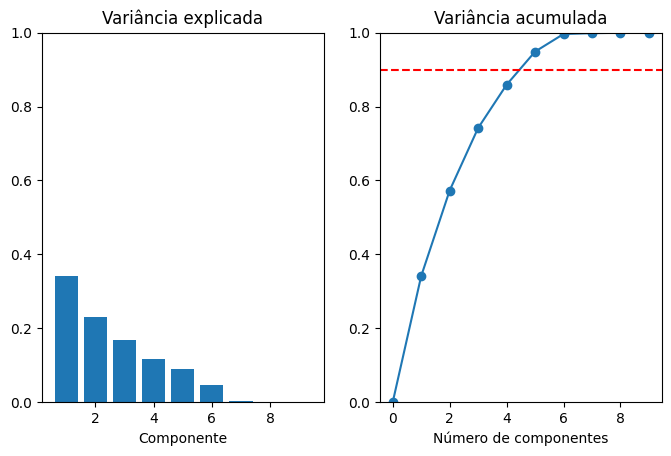

In [203]:
pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_

print(autovalores)
print()
print(variancia_explicada)
print()
print(autovetores)

# Código abaixo baseado no notebook de PCA escrito pelo Prof. James de Almeida

id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8);

In [205]:
NUM_COMPONENTES = 5
NUM_VIZINHOS = 7

modelo = make_pipeline(
    StandardScaler(),
    PCA(NUM_COMPONENTES),
    KNeighborsRegressor(n_neighbors=num_vizinhos),
)

modelo.fit(X_treino, y_treino)


X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo.predict(X_verdadeiro)

RMSE_normalizado_PCA = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

print(f"O RMSE do modelo com normalização foi de {RMSE_normalizado_PCA} unidades de y ao quadrado.")
print(f'O RMSE sem normalização foi de {RMSE_sem_normalizacao} unidades de y ao quadrado')

O RMSE do modelo com normalização foi de 731.1548778893862 unidades de y ao quadrado.
O RMSE sem normalização foi de 832.2106724613814 unidades de y ao quadrado


In [206]:
print(f'A diferença entre eles foi de {RMSE_sem_normalizacao-RMSE_normalizado_PCA} unidades de y ao quadrado')

A diferença entre eles foi de 101.0557945719952 unidades de y ao quadrado


### Referências

[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

[2] https://www.youtube.com/watch?v=Z6HGJMUakmc&pp=ygUZYmF5ZXNpYW4gcmlkZ2UgcmVncmVzc2lvbg%3D%3D

[3] https://www.simplilearn.com/tutorials/data-science-tutorial/bayesian-linear-regression#implementation_of_bayesian_regression_using_python

[4] https://towardsdatascience.com/how-to-build-a-bayesian-ridge-regression-model-with-full-hyperparameter-integration-f4ac2bdaf329